## Decades of Unemployment: A Comprehensive Analysis Across US States

### 1.1 Objective:

Unemployment, a persistent challenge in the United States, extends beyond mere statistics—it has far-reaching consequences that touch every aspect of society. This report seeks to unravel the intricate story of unemployment trends across US states over the past four decades, employing a comprehensive analysis of meticulously gathered data.

### 1.2 Purpose:

Our data visualisation notebook has one main goal: to show unemployment trends across US states in a way that's easy to understand. We're using reliable data from the Bureau of Labor Statistics to create pictures and charts that tell the story of job situations over many years. Our aim is to help everyone – from everyday people to decision-makers – see the impact of unemployment on society. Through simple and interactive visuals, we want to start conversations and help find solutions to unemployment challenges. This isn't just about numbers; it's about making the information clear and encouraging everyone to think about how we can create a stronger and fairer economy together.

### 1.3 About the Data

#### Primary Dataset:

Our primary dataset, the backbone of our analysis, is sourced from the Bureau of Labor Statistics (BLS). Specifically, we rely on the BLS's Economic News Release on (Monthly) State Employment and Unemployment. This dataset, spanning from January 1976 to the present, provides a detailed account of unemployment rates across US states. The statistics encompass crucial variables such as the Year/Month of Statistic, Total Civilian Non-Institutional Population in State/Area, Total Civilian Labor Force in State/Area, Percent (%) of State/Area's Population, Total Employment in State/Area etc. The meticulous documentation by the BLS ensures the reliability and accuracy of the information, forming the cornerstone of our comprehensive analysis.

#### Additional Datasets:

In addition to our primary dataset, we incorporate two supplementary datasets to enrich our understanding of the unemployment landscape. The first supplementary dataset delves into demographic breakdowns, offering insights into how unemployment affects different segments of the population. Sourced from [Insert Source], this dataset includes variables such as age, gender, ethnicity, and education levels, providing a nuanced perspective on the social dimensions of unemployment.

The second supplementary dataset focuses on minimum wage dynamics across US states. Acquired from [Insert Source], this dataset elucidates the variations in minimum wage rates over time. By examining the intersection of minimum wage policies and unemployment trends, we aim to uncover potential correlations and implications for the labor market.

Together, these datasets form a comprehensive foundation for our analysis, allowing us to explore the intricate interplay of economic, demographic, and policy factors influencing unemployment across the United States


Let’s look at our dataset

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets

In [97]:
pip install altair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 9.1 MB/s eta 0:00:00a 0:00:01
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install altair altair_viewer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 9.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [116]:
pip install vega-lite

ERROR: Could not find a version that satisfies the requirement vega-lite (from versions: none)
ERROR: No matching distribution found for vega-lite

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 27.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.4 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [118]:
data = pd.read_csv('Unemployment in USA.csv')
data

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
...,...,...,...,...,...,...,...,...,...,...,...
29887,51,Virginia,2022,12,"6,862,585","4,470,272",65.1,"4,330,531",63.1,"139,741",3.1
29888,53,Washington,2022,12,"6,254,253","4,015,286",64.2,"3,832,769",61.3,"182,517",4.5
29889,54,West Virginia,2022,12,"1,434,789","784,323",54.7,"752,464",52.4,"31,859",4.1
29890,55,Wisconsin,2022,12,"4,753,700","3,068,610",64.6,"2,976,670",62.6,"91,940",3.0


In [133]:
data = data.sample(frac=0.6)
data

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
243,34,New Jersey,1976-01-01,5,"5,376,000",3309870,61.6,"2,968,185",55.2,341685,10.3
14639,13,Georgia,1999-01-01,1,"5,920,185",4097159,69.2,"3,933,171",66.4,163988,4.0
28085,51,Virginia,2020-01-01,2,"6,749,274",4431692,65.7,"4,301,256",63.7,130436,2.9
9376,51,Virginia,1990-01-01,9,"4,668,149",3253567,69.7,"3,099,067",66.4,154500,4.7
13679,37,Los Angeles County,1997-01-01,7,"6,755,418",4441957,65.8,"4,141,361",61.3,300596,6.8
...,...,...,...,...,...,...,...,...,...,...,...
799,6,California,1977-01-01,4,"16,179,000",10266363,63.5,"9,370,903",57.9,895460,8.7
1731,37,North Carolina,1978-01-01,9,"4,131,000",2777987,67.2,"2,656,190",64.3,121797,4.4
14784,54,West Virginia,1999-01-01,3,"1,432,290",797860,55.7,"745,131",52.0,52729,6.6
11942,20,Kansas,1994-01-01,10,"1,905,685",1351398,70.9,"1,286,966",67.5,64432,4.8


In [134]:
data['Total Unemployment in State/Area'] = pd.to_numeric(data['Total Unemployment in State/Area'].astype(str).str.replace(',', ''), errors='coerce')

In [135]:
###Main Viz
data['Total Civilian Labor Force in State/Area'] = pd.to_numeric(data['Total Civilian Labor Force in State/Area'].astype(str).str.replace(',', ''), errors='coerce')

In [136]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Create a list of states for the dropdown widget
states = data['State/Area'].unique().tolist()

# Create widgets
state_dropdown = widgets.Dropdown(
    options=states,
    value='Alabama',  # Set default value
    description='State:'
)

year_slider = widgets.IntSlider(
    min=data['Year'].min().year,
    max=data['Year'].max().year,
    step=1,
    value=data['Year'].min().year,
    description='Year:'
)

# Function to update the plot based on user input
def update_plot(state, year):
    plt.figure(figsize=(10, 6))
    subset = data[(data['State/Area'] == state) & (data['Year'].dt.year == year)]
    plt.bar(subset['Month'], subset['Percent (%) of Labor Force Unemployed in State/Area'])
    plt.title(f'Unemployment Rate in {state} - {year}')
    plt.xlabel('Month')
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

# Define the interactive output
interactive_output = widgets.interactive_output(update_plot, {'state': state_dropdown, 'year': year_slider})

# Display the widgets and output
display(widgets.HBox([state_dropdown, year_slider]))
display(interactive_output)

Output()

In [142]:
import altair as alt
import pandas as pd

# Assuming 'data' is your DataFrame

# Convert 'Year' column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Create a list of states for the dropdown widget
states = data['State/Area'].unique().tolist()

# Define selection for the state dropdown
state_dropdown = alt.binding_select(options=states)
state_select = alt.selection_single(fields=['State/Area'], bind=state_dropdown, name='State')

# Base chart
base_chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Month:T', title='Month'),
    y=alt.Y('Percent (%) of Labor Force Unemployed in State/Area:Q', title='Unemployment Rate'),
    color='Month:N',
    tooltip=['Month:T', 'Percent (%) of Labor Force Unemployed in State/Area:Q']
).properties(width=600, height=300)

# Layer chart with state selection
chart = base_chart.add_selection(state_select).transform_filter(state_select)

# Save the Altair chart as an interactive HTML file
chart.save('interactive_unemployment_chart.html')
chart.save('interactive_unemployment_chart.json')
chart

alt.Chart(...)

In [143]:
wage_data = pd.read_csv("Minimum Wage Data.csv")
wage_data

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [173]:
import altair as alt
import pandas as pd

# Sample data
# Ensure you have the 'wage_data' DataFrame defined with the appropriate columns

# Calculate average wages
avg_wages = wage_data.groupby('State')['Effective.Minimum.Wage.2020.Dollars'].mean().sort_values().reset_index()

# Altair bar chart
bar_chart_avg_wages = alt.Chart(avg_wages).mark_bar(color='skyblue').encode(
    x=alt.X('State:N', sort=alt.EncodingSortField(field='Effective.Minimum.Wage.2020.Dollars', op='mean', order='ascending')),
    y='Effective.Minimum.Wage.2020.Dollars:Q',
    tooltip=['State:N', 'Effective.Minimum.Wage.2020.Dollars:Q']
).properties(
    width=800,
    height=400,
    title='Average Minimum Wage by State (2020 Dollars)'
)

# Save the Altair plot as an HTML file
bar_chart_avg_wages.save('Average_Minimum_Wage_by_State_Altair.html')

# Save the data as a JSON file
avg_wages.to_json('altair_average_minimum_wage_data.json', orient='records')
bar_chart_avg_wages

alt.Chart(...)

In [172]:
import altair as alt
import pandas as pd
import seaborn as sns

# Sample data
# Ensure you have the 'wage_data' DataFrame defined with the appropriate columns

# Your existing code for color palette
colors = sns.color_palette("husl", n_colors=len(wage_data['State'].unique()))
state_colors = dict(zip(wage_data['State'].unique(), colors))

# Melt the dataframe for Altair
data_melted_wage = pd.melt(wage_data, id_vars=['Year', 'State'], value_vars=['Effective.Minimum.Wage.2020.Dollars'], var_name='Wage Type', value_name='Effective Minimum Wage')

# Altair line plot
line_plot_wage = alt.Chart(data_melted_wage).mark_line(point=True).encode(
    x='Year:O',
    y='Effective Minimum Wage:Q',
    color=alt.Color('State:N', scale=alt.Scale(scheme='category10'), legend=alt.Legend(title='State')),
    tooltip=['Year:N', 'Effective Minimum Wage:Q']
).properties(
    width=800,
    height=500,
    title='Minimum Wage Over the Years by State'
)



# Save the data as a JSON file
data_melted_wage.to_json('altair_minimum_wage_data.json', orient='records')
line_plot_wage

alt.Chart(...)

In [170]:
import altair as alt
import pandas as pd
import seaborn as sns

# Sample data
# Ensure you have the 'wage_data' DataFrame defined with the appropriate columns

# Your existing code for color palette
colors = sns.color_palette("husl", n_colors=len(wage_data['State'].unique()))
state_colors = dict(zip(wage_data['State'].unique(), colors))

# Melt the dataframe for Altair
data_melted_wage = pd.melt(wage_data, id_vars=['Year', 'State'], value_vars=['Effective.Minimum.Wage.2020.Dollars'], var_name='Wage Type', value_name='Effective Minimum Wage')

# Altair line plot
line_plot_wage = alt.Chart(data_melted_wage).mark_line(point=True).encode(
    x='Year:O',
    y='Effective Minimum Wage:Q',
    color=alt.Color('State:N', scale=alt.Scale(scheme='category10'), legend=alt.Legend(title='State')),
    tooltip=['Year:N', 'Effective Minimum Wage:Q']
).properties(
    width=800,
    height=500,
    title='Minimum Wage Over the Years by State'
)

# Save the Altair plot as an HTML file
line_plot_wage.save('Minimum_Wage_Over_the_Years_Altair.html')

# Save the data as a JSON file
data_melted_wage.to_json('altair_minimum_wage_data.json', orient='records')
line_plot_wage

alt.Chart(...)

### Second Viz

In [152]:
unemployment_data = pd.read_csv('unemployed_population_1978-12_to_2023-07.csv')
unemployment_data

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1979-04-01,5.9,11.9,4.2,2.8,3.7,9.9,5.4,4.9,3.0,...,9.4,2.8,2.3,3.5,7.5,3.8,3.6,2.0,1.3,164162000
532,1979-03-01,6.0,12.0,4.3,2.8,3.8,9.9,5.4,4.9,3.0,...,9.4,2.8,2.4,3.5,7.5,3.8,3.6,2.1,1.3,164027000
533,1979-02-01,6.0,12.2,4.3,2.8,3.8,9.9,5.4,5.0,3.0,...,9.6,2.8,2.4,3.5,7.6,3.9,3.6,2.1,1.4,163726000
534,1979-01-01,6.1,12.3,4.3,2.9,3.7,10.0,5.5,5.0,3.1,...,9.7,2.9,2.5,3.5,7.6,3.9,3.7,2.1,1.4,163516000


In [153]:
unemployment_data.dropna()

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1979-04-01,5.9,11.9,4.2,2.8,3.7,9.9,5.4,4.9,3.0,...,9.4,2.8,2.3,3.5,7.5,3.8,3.6,2.0,1.3,164162000
532,1979-03-01,6.0,12.0,4.3,2.8,3.8,9.9,5.4,4.9,3.0,...,9.4,2.8,2.4,3.5,7.5,3.8,3.6,2.1,1.3,164027000
533,1979-02-01,6.0,12.2,4.3,2.8,3.8,9.9,5.4,5.0,3.0,...,9.6,2.8,2.4,3.5,7.6,3.9,3.6,2.1,1.4,163726000
534,1979-01-01,6.1,12.3,4.3,2.9,3.7,10.0,5.5,5.0,3.1,...,9.7,2.9,2.5,3.5,7.6,3.9,3.7,2.1,1.4,163516000


<ipython-input-154-d434008d706f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sec['date'] = pd.to_datetime(data_sec['date'])


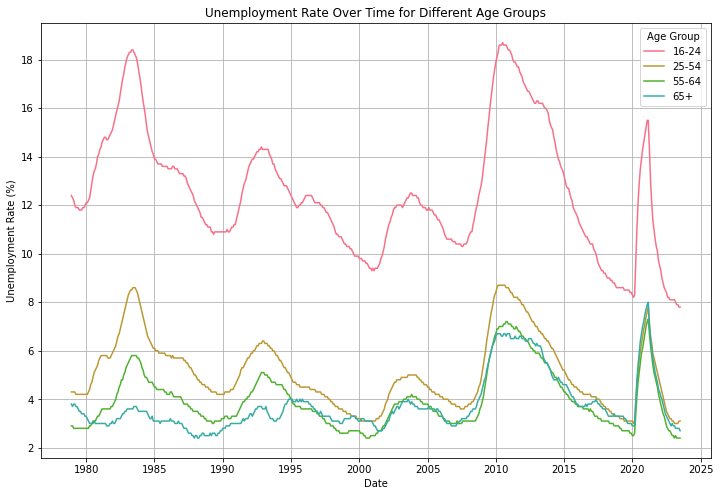

In [154]:
age_columns = ['16-24', '25-54', '55-64', '65+']
data_sec = unemployment_data[['date'] + age_columns]
data_sec['date'] = pd.to_datetime(data_sec['date'])
plt.figure(figsize=(12, 8))




for age_group in age_columns:
    plt.plot(data_sec['date'], data_sec[age_group], label=age_group)

plt.title('Unemployment Rate Over Time for Different Age Groups')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Age Group')
plt.grid(True)

# Save the figure as a PNG file
plt.savefig('Unemployment_Rate_Over_Time_Age_Groups.png')

# Save the data as a JSON file
data_sec_json = data_sec.to_json('2unemployment_data_age_groups.json', orient='records')

plt.show()


In [163]:
import pandas as pd
import altair as alt

# Sample data
age_columns = ['16-24', '25-54', '55-64', '65+']
data_sec = unemployment_data[['date'] + age_columns]

# Corrected assignment to avoid SettingWithCopyWarning
data_sec.loc[:, 'date'] = pd.to_datetime(data_sec['date'])

# Melt the dataframe for Altair
data_melted = pd.melt(data_sec, id_vars=['date'], value_vars=age_columns, var_name='Age Group', value_name='Unemployment Rate')

# Altair line plot
line_plot = alt.Chart(data_melted).mark_line().encode(
    x='date:T',
    y='Unemployment Rate:Q',
    color='Age Group:N',
    tooltip=['date:T', 'Unemployment Rate:Q']
).properties(
    width=800,
    height=500,
    title='Unemployment Rate Over Time for Different Age Groups'
)

# Save the Altair plot as an HTML file
line_plot.save('Unemployment_Rate_Over_Time_Age_Groups.html')

# Save the data as a JSON file
data_melted.to_json('altair_unemployment_data_age_groups.json', orient='records')
line_plot

alt.Chart(...)

<ipython-input-164-20ae26c5611d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data_gender['date'] = pd.to_datetime(unemployment_data_gender['date'])


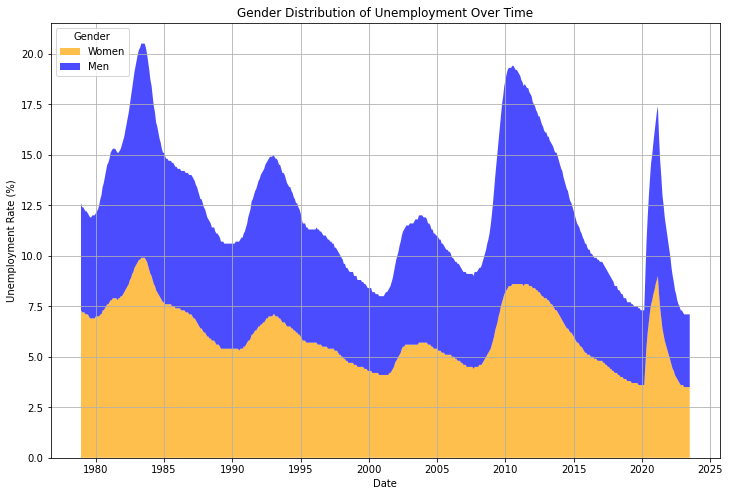

In [164]:
gender_columns = ['women', 'men']
unemployment_data_gender = unemployment_data[['date'] + gender_columns]


unemployment_data_gender['date'] = pd.to_datetime(unemployment_data_gender['date'])


plt.figure(figsize=(12, 8))
plt.stackplot(unemployment_data_gender['date'], 
              unemployment_data_gender['women'], 
              unemployment_data_gender['men'],
              labels=['Women', 'Men'], 
              colors=['orange', 'blue'],
              alpha=0.7)

plt.title('Gender Distribution of Unemployment Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Gender', loc='upper left')
plt.grid(True)



plt.savefig('Gender_Distribution_of_Unemployment.png')
unemployment_data_gender_json = unemployment_data_gender.to_json('2unemployment_data_gender.json', orient='records')

plt.show()

In [166]:
import pandas as pd
import altair as alt

# Sample data
gender_columns = ['women', 'men']
unemployment_data_gender = unemployment_data[['date'] + gender_columns]

# Corrected assignment to avoid SettingWithCopyWarning
unemployment_data_gender['date'] = pd.to_datetime(unemployment_data_gender['date'])

# Melt the dataframe for Altair
data_melted_gender = pd.melt(unemployment_data_gender, id_vars=['date'], value_vars=gender_columns, var_name='Gender', value_name='Unemployment Rate')

# Altair stacked area plot
area_plot_gender = alt.Chart(data_melted_gender).mark_area(opacity=0.7).encode(
    x='date:T',
    y='Unemployment Rate:Q',
    color='Gender:N',
    tooltip=['date:T', 'Unemployment Rate:Q']
).properties(
    width=800,
    height=500,
    title='Gender Distribution of Unemployment Over Time'
)

# Save the Altair plot as an HTML file
area_plot_gender.save('Gender_Distribution_of_Unemployment_Altair.html')

# Save the data as a JSON file
data_melted_gender.to_json('altair_unemployment_data_gender.json', orient='records')
area_plot_gender

<ipython-input-166-70fdba9bc544>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data_gender['date'] = pd.to_datetime(unemployment_data_gender['date'])


alt.Chart(...)